In [2]:
import math
import mpmath 
import numpy as np
import matplotlib.pyplot as plt

In [200]:
th = 1000.
def zeta_size(X,Y):
    xn, yn = X.shape
    Z = X*0
    for i in range(xn):
        for k in range(yn):
            m = abs(mpmath.zeta(complex(X[i,k],Y[i,k])))
            if m > th:
                Z[i,k] = 1
            else:
                Z[i,k] = (m/th)**.07
    return Z

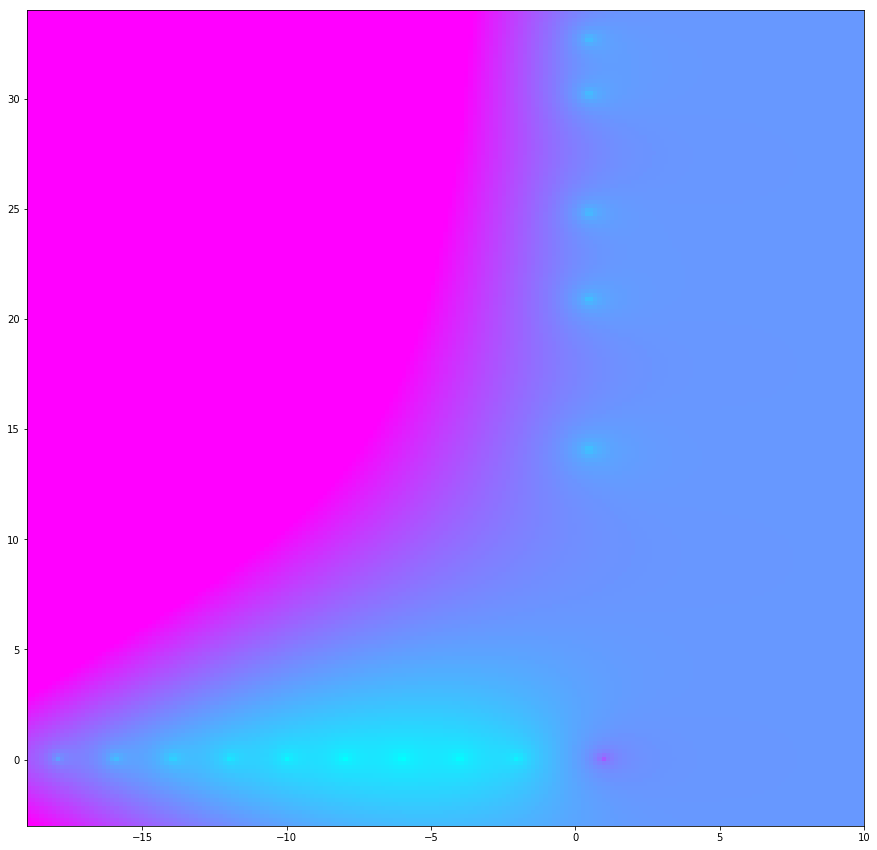

In [201]:
#x1 = -5.
#x2 = 2.
#y1 = -2.
#y2 = 6.
x1 = -19.
x2 = 10.
y1 = -3.
y2 = 34.
nx = 200
dx = (x2-x1)/nx
ny = nx
dy = (y2-y1)/ny
x = np.arange(x1, x2+dx, dx)
y = np.arange(y1, y2+dy, dy)
X, Y = np.meshgrid(x, y)
Z = zeta_size(X,Y)
#cvals = np.arange(2**(-10),2**(-9),2**(-13))
#cvals = np.append(cvals,[2**i for i in np.arange(-9,20,.01)])
plt.figure(figsize=(15,15))
plt.imshow(Z, extent=[x1, x2, y1, y2], cmap=plt.cm.cool, origin='lower',aspect='auto')
#plt.contour(X, Y, Z, cmap=plt.cm.cool, origin='lower')
#plt.colorbar()
plt.savefig("zetamag.png", dpi=200)
plt.show()

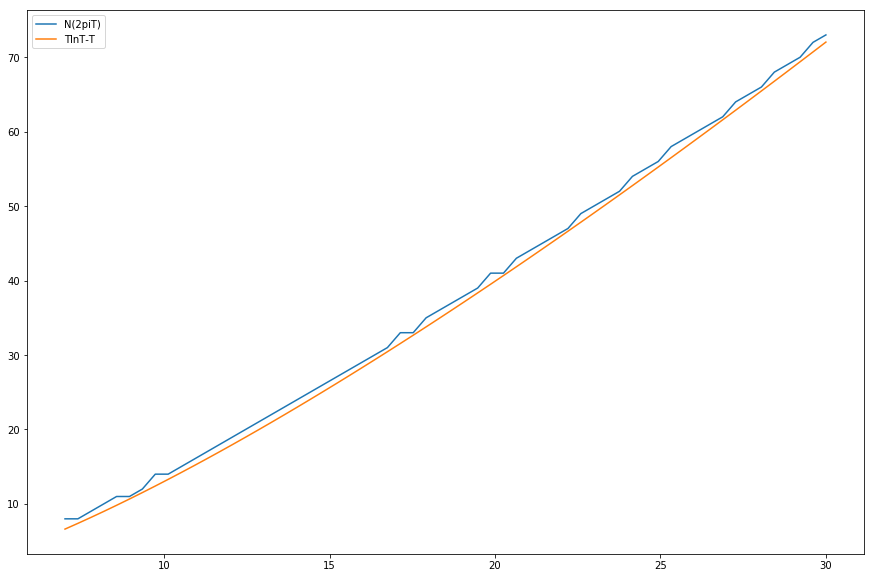

In [234]:
n=30
xres=np.linspace(7,n,60)
ff=2*math.pi
plt.figure(figsize=(15,10))
plt.plot(xres,[mpmath.nzeros(ff*x) for x in xres],label='N(2piT)')
plt.plot(xres,[x*math.log(x)-x for x in xres],label='TlnT-T')
plt.legend()
#plt.savefig("nt.png", dpi=200)
plt.show()

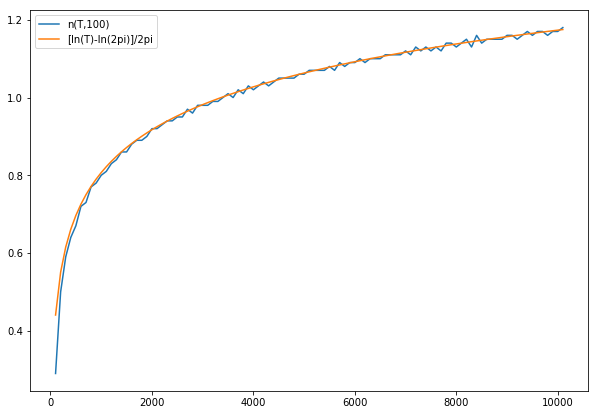

In [227]:
m=100
d=100.
dt=[]
dn=[]
dt.append(d)
nz=mpmath.nzeros(d)/d
dn.append(nz)
t=d
for i in range(m):
    t+=d
    dt.append(t)
    nzz=mpmath.nzeros(t)/d
    dn.append(nzz-nz)
    nz=nzz
ff=.5/math.pi
dd=ff*math.log(2*math.pi)
plt.figure(figsize=(10,7))
plt.plot(dt,dn,label='n(T,100)')
plt.plot(dt,[ff*math.log(dt[i])-dd for i in range(len(dt))],label='[ln(T)-ln(2pi)]/2pi')
#plt.semilogy()
plt.legend()
#plt.savefig("ntd.png", dpi=200)
plt.show()

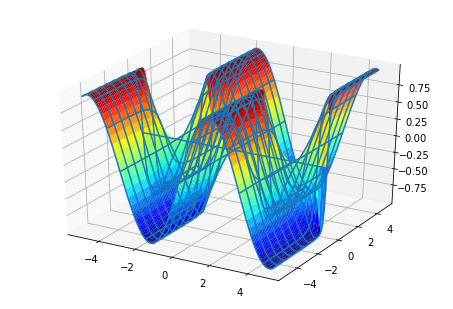

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab
import numpy as np
import mpmath
mpmath.dps = 5

# Use instead of arg for a continuous phase
def arg2(x):
    return mpmath.sin(mpmath.arg(x))

#f = lambda z: abs(mpmath.loggamma(z))
#f = lambda z: arg2(mpmath.exp(z))
#f = lambda z: abs(mpmath.besselj(3,z))
f = lambda z: arg2(mpmath.cos(z))

fig = pylab.figure()
ax = Axes3D(fig)
X = np.arange(-5, 5, 0.125)
Y = np.arange(-5, 5, 0.125)
X, Y = np.meshgrid(X, Y)
xn, yn = X.shape
W = X*0
for xk in range(xn):
    for yk in range(yn):
        try:
            z = complex(X[xk,yk],Y[xk,yk])
            w = float(f(z))
            if w != w:
                raise ValueError
            W[xk,yk] = w
        except (ValueError, TypeError, ZeroDivisionError):
            # can handle special values here
            pass
#    print xk, xn

# can comment out one of these
ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet)
ax.plot_wireframe(X, Y, W, rstride=5, cstride=5)

pylab.show()

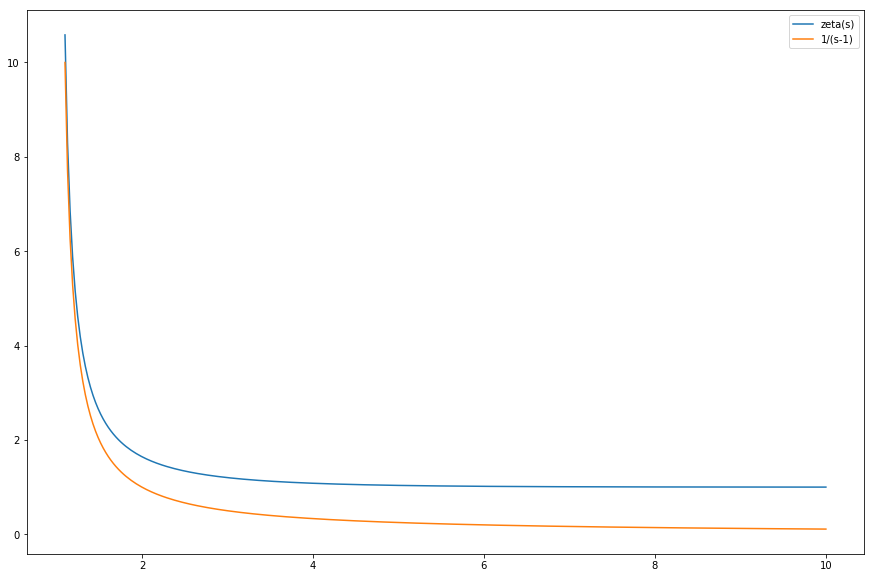

In [262]:
xres=np.linspace(1.1,10,300)
plt.figure(figsize=(15,10))
plt.plot(xres,[mpmath.zeta(x) for x in xres],label='zeta(s)')
plt.plot(xres,[1/(x-1) for x in xres],label='1/(s-1)')
plt.legend()
plt.savefig("zetapole.png", dpi=200)
plt.show()

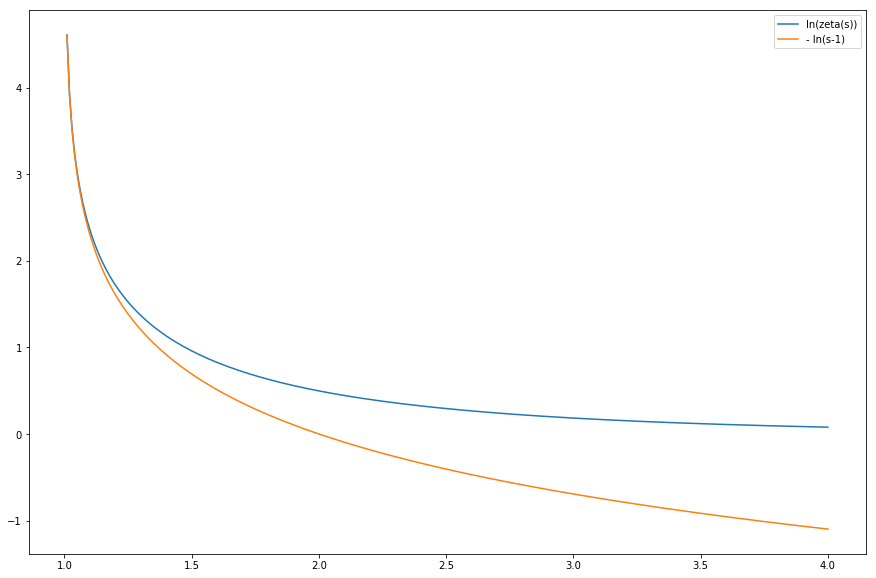

In [270]:
xres=np.linspace(1.01,4,300)
plt.figure(figsize=(15,10))
plt.plot(xres,[math.log(mpmath.zeta(x)) for x in xres],label='ln(zeta(s))')
plt.plot(xres,[-math.log(x-1) for x in xres],label='- ln(s-1)')
plt.legend()
#plt.savefig("logzeta.png", dpi=200)
plt.show()